In [25]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

# Барьерные опционы

Пример 1. Оцените стоимость опциона down-and-in колл с датой экспирации через 6 месяцев, если текущая стоимость акции 100, волатильность акции 30\%, барьер 100, цена страйк 90, компенсационная выплата 3. Безрисковая ставка 8\%, стоимость переноса позиции 4\%.

In [26]:
S = 100
H = 100
K = 90
R = 3
T = 0.5
r = 0.08
b = 0.04
q = r - b
sigma = 0.3

In [27]:
def call_di(S, H, K, T, r, q, sigma):
  if S > H:
    return C + E
  else:
    return A - B + D + E

# down-and-in call
eta = 1
phi = 1

mu = (b-sigma**2/2)/sigma**2
lam = np.sqrt(mu**2 + 2*r/sigma**2)

x1 = np.log(S/K)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)
x2 = np.log(S/H)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)

y1 = np.log(H**2/S/K)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)
y2 = np.log(H/S)/sigma/np.sqrt(T)      + (1 + mu)*sigma*np.sqrt(T)

z = np.log(H/S)/sigma/np.sqrt(T) + lam*sigma*np.sqrt(T)

A = phi*S*np.exp((b-r)*T)*norm.cdf(phi*x1)-\
phi*K*np.exp(-r*T)*norm.cdf(phi*x1-phi*sigma*np.sqrt(T))

B = phi*S*np.exp((b-r)*T)*norm.cdf(phi*x2)-\
phi*K*np.exp(-r*T)*norm.cdf(phi*x2-phi*sigma*np.sqrt(T))

C = phi*S*np.exp((b-r)*T)*(H/S)**(2*(mu+1))*norm.cdf(eta*y1)-\
phi*K*np.exp(-r*T)*norm.cdf(eta*y1-eta*sigma*np.sqrt(T))*(H/S)**(2*mu)

D = phi*S*np.exp((b-r)*T)*(H/S)**(2*(mu+1))*norm.cdf(eta*y2)-\
phi*K*np.exp(-r*T)*norm.cdf(eta*y2-eta*sigma*np.sqrt(T))*(H/S)**(2*mu)

E = R*np.exp(-r*T)*(norm.cdf(eta*x2-eta*sigma*np.sqrt(T))-(H/S)**(2*mu)*\
                            norm.cdf(eta*y2-eta*sigma*np.sqrt(T)))

F = R*((H/S)**(mu+lam)*norm.cdf(eta*z)+(H/S)**(mu-lam)*norm.cdf(eta*z - 2*eta*lam*sigma*np.sqrt(T)))


print('down-and-in call = ', call_di(S, H, K, T, r, q, sigma))

down-and-in call =  14.88162080496874


В условиях примера 1 напишите универсальную функцию для оценки стоимости 8 видов  барьерных опционов. Для проверки результатов использовать таблицу:
\
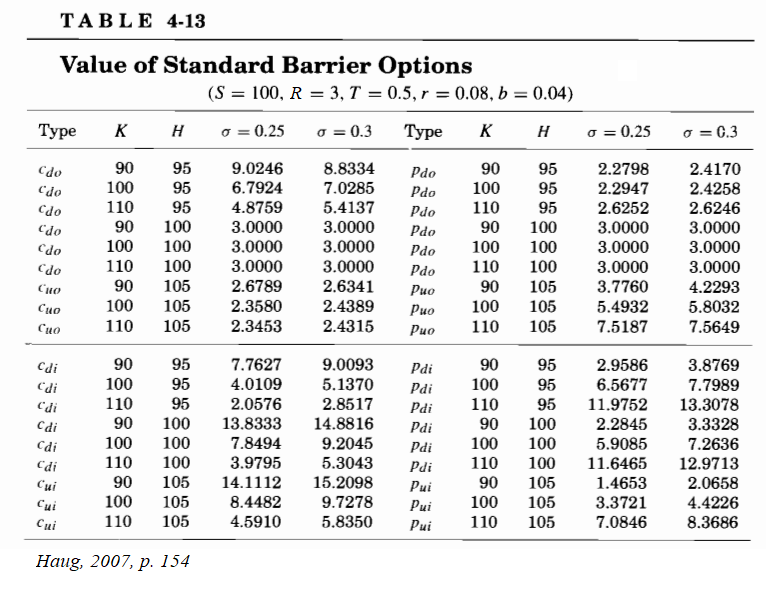

In [28]:
def x1(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return np.log(S/K)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)

def x2(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return np.log(S/H)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)

def y1(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return np.log(H**2/S/K)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)

def y2(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return np.log(H/S)/sigma/np.sqrt(T) + (1 + mu)*sigma*np.sqrt(T)

def z(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return np.log(H/S)/sigma/np.sqrt(T) + lam*sigma*np.sqrt(T)

def A(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return phi*S*np.exp((b-r)*T)*norm.cdf(phi*x1(S, H, K, R, T, r, b, sigma, phi, eta))-\
    phi*K*np.exp(-r*T)*norm.cdf(phi*x1(S, H, K, R, T, r, b, sigma, phi, eta)-phi*sigma*np.sqrt(T))

def B(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return phi*S*np.exp((b-r)*T)*norm.cdf(phi*x2(S, H, K, R, T, r, b, sigma, phi, eta))-\
    phi*K*np.exp(-r*T)*norm.cdf(phi*x2(S, H, K, R, T, r, b, sigma, phi, eta)-phi*sigma*np.sqrt(T))

def C(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return phi*S*np.exp((b-r)*T)*(H/S)**(2*(mu+1))*norm.cdf(eta*y1(S, H, K, R, T, r, b, sigma, phi, eta))-\
    phi*K*np.exp(-r*T)*norm.cdf(eta*y1(S, H, K, R, T, r, b, sigma, phi, eta)-eta*sigma*np.sqrt(T))*(H/S)**(2*mu)

def D(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return phi*S*np.exp((b-r)*T)*(H/S)**(2*(mu+1))*norm.cdf(eta*y2(S, H, K, R, T, r, b, sigma, phi, eta))-\
    phi*K*np.exp(-r*T)*norm.cdf(eta*y2(S, H, K, R, T, r, b, sigma, phi, eta)-eta*sigma*np.sqrt(T))*(H/S)**(2*mu)

def E(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return R*np.exp(-r*T)*(norm.cdf(eta*x2(S, H, K, R, T, r, b, sigma, phi, eta)-eta*sigma*np.sqrt(T))-(H/S)**(2*mu)*\
                            norm.cdf(eta*y2(S, H, K, R, T, r, b, sigma, phi, eta)-eta*sigma*np.sqrt(T)))

def F(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b-sigma**2/2)/sigma**2
    lam = np.sqrt(mu**2 + 2*r/sigma**2)
    return R*((H/S)**(mu+lam)*norm.cdf(eta*z(S, H, K, R, T, r, b, sigma, phi, eta))+(H/S)**(mu-lam)*norm.cdf(eta*z(S, H, K, R, T, r, b, sigma, phi, eta) - 2*eta*lam*sigma*np.sqrt(T)))

def di_barrier_call(S, H, K, R, T, r, b, sigma):
    if K > H:
        eta = 1
        phi = 1
        return C(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = 1
        phi = 1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) - B(S, H, K, R, T, r, b, sigma, phi, eta) \
             + D(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)

def ui_barrier_call(S, H, K, R, T, r, b, sigma):
    if K > H:
        eta = -1
        phi = 1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = -1
        phi = 1
        return B(S, H, K, R, T, r, b, sigma, phi, eta) - C(S, H, K, R, T, r, b, sigma, phi, eta) \
             + D(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)

def di_barrier_put(S, H, K, R, T, r, b, sigma):
    if K < H:
        eta = 1
        phi = -1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = 1
        phi = -1
        return B(S, H, K, R, T, r, b, sigma, phi, eta) - C(S, H, K, R, T, r, b, sigma, phi, eta) \
             + D(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)

def ui_barrier_put(S, H, K, R, T, r, b, sigma):
    if K < H:
        eta = -1
        phi = -1
        return C(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = -1
        phi = -1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) - B(S, H, K, R, T, r, b, sigma, phi, eta) \
             + D(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)
###
def do_barrier_call(S, H, K, R, T, r, b, sigma):
    if K > H:
        eta = 1
        phi = 1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) - C(S, H, K, R, T, r, b, sigma, phi, eta)\
             + F(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = 1
        phi = 1
        return B(S, H, K, R, T, r, b, sigma, phi, eta) - D(S, H, K, R, T, r, b, sigma, phi, eta)\
             + F(S, H, K, R, T, r, b, sigma, phi, eta)

def uo_barrier_call(S, H, K, R, T, r, b, sigma):
    if K > H:
        eta = -1
        phi = 1
        return F(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = -1
        phi = 1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) - B(S, H, K, R, T, r, b, sigma, phi, eta) \
             + C(S, H, K, R, T, r, b, sigma, phi, eta) - D(S, H, K, R, T, r, b, sigma, phi, eta) \
             + F(S, H, K, R, T, r, b, sigma, phi, eta)

def do_barrier_put(S, H, K, R, T, r, b, sigma):
    if K > H:
        eta = 1
        phi = -1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) - B(S, H, K, R, T, r, b, sigma, phi, eta) \
             + C(S, H, K, R, T, r, b, sigma, phi, eta) - D(S, H, K, R, T, r, b, sigma, phi, eta) \
             + F(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = 1
        phi = -1
        return F(S, H, K, R, T, r, b, sigma, phi, eta)

def uo_barrier_put(S, H, K, R, T, r, b, sigma):
    if K > H:
        eta = -1
        phi = -1
        return B(S, H, K, R, T, r, b, sigma, phi, eta) - D(S, H, K, R, T, r, b, sigma, phi, eta) \
             + F(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = -1
        phi = -1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) - C(S, H, K, R, T, r, b, sigma, phi, eta) \
             + F(S, H, K, R, T, r, b, sigma, phi, eta)

def barrier_option(option_type, S, H, K, R, T, r, b, sigma, is_call):
    if option_type == "Up-and-out" and is_call == True:
        exact_calc_result = uo_barrier_call(S, H, K, R, T, r, b, sigma)

    elif option_type == "Up-and-out" and is_call == False:
        exact_calc_result = uo_barrier_put(S, H, K, R, T, r, b, sigma)

    elif option_type == "Down-and-out" and is_call == True:
        exact_calc_result = do_barrier_call(S, H, K, R, T, r, b, sigma)

    elif option_type == "Down-and-out" and is_call == False:
        exact_calc_result = do_barrier_put(S, H, K, R, T, r, b, sigma)

    elif option_type == "Up-and-in" and is_call == True:
        exact_calc_result = ui_barrier_call(S, H, K, R, T, r, b, sigma)

    elif option_type == "Up-and-in" and is_call == False:
        exact_calc_result = ui_barrier_put(S, H, K, R, T, r, b, sigma)

    elif option_type == "Down-and-in" and is_call == True:
        exact_calc_result = di_barrier_call(S, H, K, R, T, r, b, sigma)

    elif option_type == "Down-and-in" and is_call == False:
        exact_calc_result = di_barrier_put(S, H, K, R, T, r, b, sigma)
    else:
        print("Unknown option type")
        return
    return exact_calc_result

In [29]:
K = 90
H = 95
sigma = 0.25
S = 100
T = 0.5
R = 3
b = 0.04
r = 0.08
option_type = "Down-and-out"
is_call = True
barrier_option(option_type, S, H, K, R, T, r, b, sigma, is_call)

9.02456769496686

## Задача

Задача. Проварьируйте переменные $H$, $K$, $\sigma$, типы опционов и
*   постройте таблицу 4-13 ([Haug, 2007](https://drive.google.com/file/d/1yxjRkchVqvl2xkQFyeB2BKNQ1SKJSTtK/view?usp=sharing)),
*   постройте поверхности для различных $K=\{90, 100, 110\}$, $H=\{95, 100, 105\}$ и $\sigma=0.3$.

    Type    K    H  Price_sigma_0.25  Price_sigma_0.3
0   C_di   90   95          7.762670         9.009344
1   C_di   90  100         13.833287        14.881621
2   C_di   90  105         22.429235        22.701554
3   C_di  100   95          4.010942         5.137039
4   C_di  100  100          7.849428         9.204497
..   ...  ...  ...               ...              ...
67  P_uo  100  100          3.000000         3.000000
68  P_uo  100  105          5.493228         5.803252
69  P_uo  110   95         -3.363232        -3.252054
70  P_uo  110  100          3.000000         3.000000
71  P_uo  110  105          7.518722         7.564957

[72 rows x 5 columns]


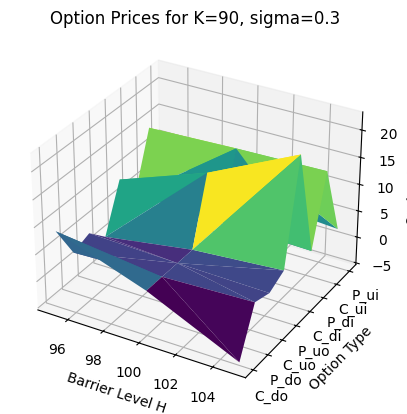

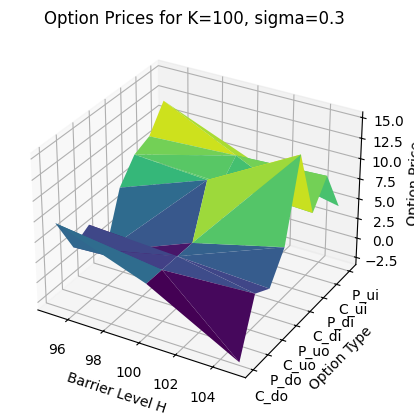

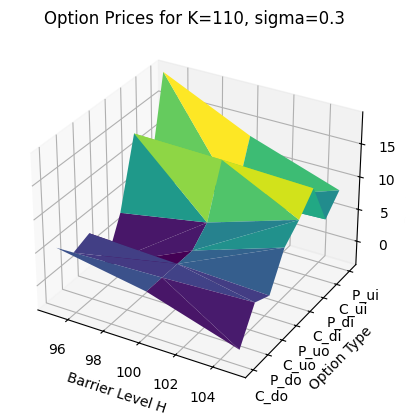

In [ ]:
import pandas as pd


def x1(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b - sigma**2 / 2) / sigma**2
    return (np.log(S / K) / (sigma * np.sqrt(T)) + (1 + mu) * sigma * np.sqrt(T))

def x2(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b - sigma**2 / 2) / sigma**2
    return (np.log(S / H) / (sigma * np.sqrt(T)) + (1 + mu) * sigma * np.sqrt(T))

def y1(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b - sigma**2 / 2) / sigma**2
    return (np.log(H**2 / (S * K)) / (sigma * np.sqrt(T)) + (1 + mu) * sigma * np.sqrt(T))

def y2(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b - sigma**2 / 2) / sigma**2
    return (np.log(H / S) / (sigma * np.sqrt(T)) + (1 + mu) * sigma * np.sqrt(T))

def z(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b - sigma**2 / 2) / sigma**2
    lam = np.sqrt(mu**2 + 2 * r / sigma**2)
    return (np.log(H / S) / (sigma * np.sqrt(T)) + lam * sigma * np.sqrt(T))

def A(S, H, K, R, T, r, b, sigma, phi, eta):
    return (phi * S * np.exp((b - r) * T) * norm.cdf(phi * x1(S, H, K, R, T, r, b, sigma, phi, eta)) -
            phi * K * np.exp(-r * T) * norm.cdf(phi * x1(S, H, K, R, T, r, b, sigma, phi, eta) - phi * sigma * np.sqrt(T)))

def B(S, H, K, R, T, r, b, sigma, phi, eta):
    return (phi * S * np.exp((b - r) * T) * norm.cdf(phi * x2(S, H, K, R, T, r, b, sigma, phi, eta)) -
            phi * K * np.exp(-r * T) * norm.cdf(phi * x2(S, H, K, R, T, r, b, sigma, phi, eta) - phi * sigma * np.sqrt(T)))

def C(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b - sigma**2 / 2) / sigma**2
    return (phi * S * np.exp((b - r) * T) * (H / S)**(2 * (mu + 1)) * norm.cdf(eta * y1(S, H, K, R, T, r, b, sigma, phi, eta)) -
            phi * K * np.exp(-r * T) * (H / S)**(2 * mu) * norm.cdf(eta * y1(S, H, K, R, T, r, b, sigma, phi, eta) - eta * sigma * np.sqrt(T)))

def D(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b - sigma**2 / 2) / sigma**2
    return (phi * S * np.exp((b - r) * T) * (H / S)**(2 * (mu + 1)) * norm.cdf(eta * y2(S, H, K, R, T, r, b, sigma, phi, eta)) -
            phi * K * np.exp(-r * T) * (H / S)**(2 * mu) * norm.cdf(eta * y2(S, H, K, R, T, r, b, sigma, phi, eta) - eta * sigma * np.sqrt(T)))

def E(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b - sigma**2 / 2) / sigma**2
    return (R * np.exp(-r * T) * (norm.cdf(eta * x2(S, H, K, R, T, r, b, sigma, phi, eta) - eta * sigma * np.sqrt(T)) -
            (H / S)**(2 * mu) * norm.cdf(eta * y2(S, H, K, R, T, r, b, sigma, phi, eta) - eta * sigma * np.sqrt(T))))

def F(S, H, K, R, T, r, b, sigma, phi, eta):
    mu = (b - sigma**2 / 2) / sigma**2
    lam = np.sqrt(mu**2 + 2 * r / sigma**2)
    return (R * ((H / S)**(mu + lam) * norm.cdf(eta * z(S, H, K, R, T, r, b, sigma, phi, eta)) +
                 (H / S)**(mu - lam) * norm.cdf(eta * z(S, H, K, R, T, r, b, sigma, phi, eta) - 2 * eta * lam * sigma * np.sqrt(T))))

def di_barrier_call(S, H, K, R, T, r, b, sigma):
    if K > H:
        eta = 1
        phi = 1
        return C(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = 1
        phi = 1
        return (A(S, H, K, R, T, r, b, sigma, phi, eta) - B(S, H, K, R, T, r, b, sigma, phi, eta) +
                D(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta))

def ui_barrier_call(S, H, K, R, T, r, b, sigma):
    if K > H:
        eta = -1
        phi = 1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = -1
        phi = 1
        return (B(S, H, K, R, T, r, b, sigma, phi, eta) - C(S, H, K, R, T, r, b, sigma, phi, eta) +
                D(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta))

def di_barrier_put(S, H, K, R, T, r, b, sigma):
    if K < H:
        eta = 1
        phi = -1
        return A(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = 1
        phi = -1
        return (B(S, H, K, R, T, r, b, sigma, phi, eta) - C(S, H, K, R, T, r, b, sigma, phi, eta) +
                D(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta))

def ui_barrier_put(S, H, K, R, T, r, b, sigma):
    if K < H:
        eta = -1
        phi = -1
        return C(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = -1
        phi = -1
        return (A(S, H, K, R, T, r, b, sigma, phi, eta) - B(S, H, K, R, T, r, b, sigma, phi, eta) +
                D(S, H, K, R, T, r, b, sigma, phi, eta) + E(S, H, K, R, T, r, b, sigma, phi, eta))

def do_barrier_call(S, H, K, R, T, r, b, sigma):
    if K > H:
        eta = 1
        phi = 1
        return (A(S, H, K, R, T, r, b, sigma, phi, eta) - C(S, H, K, R, T, r, b, sigma, phi, eta) +
                F(S, H, K, R, T, r, b, sigma, phi, eta))
    else:
        eta = 1
        phi = 1
        return (B(S, H, K, R, T, r, b, sigma, phi, eta) - D(S, H, K, R, T, r, b, sigma, phi, eta) +
                F(S, H, K, R, T, r, b, sigma, phi, eta))

def uo_barrier_call(S, H, K, R, T, r, b, sigma):
    if K > H:
        eta = -1
        phi = 1
        return F(S, H, K, R, T, r, b, sigma, phi, eta)
    else:
        eta = -1
        phi = 1
        return (A(S, H, K, R, T, r, b, sigma, phi, eta) - B(S, H, K, R, T, r, b, sigma, phi, eta) +
                C(S, H, K, R, T, r, b, sigma, phi, eta) - D(S, H, K, R, T, r, b, sigma, phi, eta) +
                F(S, H, K, R, T, r, b, sigma, phi, eta))

def do_barrier_put(S, H, K, R, T, r, b, sigma):
    if K > H:
        eta = 1
        phi = -1
        return (A(S, H, K, R, T, r, b, sigma, phi, eta) - B(S, H, K, R, T, r, b, sigma, phi, eta) +
                C(S, H, K, R, T, r, b, sigma, phi, eta) - D(S, H, K, R, T, r, b, sigma, phi, eta) +
                F(S, H, K, R, T, r, b, sigma, phi, eta))
    else:
        eta = 1
        phi = -1
        return F(S, H, K, R, T, r, b, sigma, phi, eta)

def uo_barrier_put(S, H, K, R, T, r, b, sigma):
    if K > H:
        eta = -1
        phi = -1
        return (B(S, H, K, R, T, r, b, sigma, phi, eta) - D(S, H, K, R, T, r, b, sigma, phi, eta) +
                F(S, H, K, R, T, r, b, sigma, phi, eta))
    else:
        eta = -1
        phi = -1
        return (A(S, H, K, R, T, r, b, sigma, phi, eta) - C(S, H, K, R, T, r, b, sigma, phi, eta) +
                F(S, H, K, R, T, r, b, sigma, phi, eta))

def barrier_option(option_type, S, H, K, R, T, r, b, sigma, is_call):
    if option_type == "Up-and-out" and is_call == True:
        return uo_barrier_call(S, H, K, R, T, r, b, sigma)
    elif option_type == "Up-and-out" and is_call == False:
        return uo_barrier_put(S, H, K, R, T, r, b, sigma)
    elif option_type == "Down-and-out" and is_call == True:
        return do_barrier_call(S, H, K, R, T, r, b, sigma)
    elif option_type == "Down-and-out" and is_call == False:
        return do_barrier_put(S, H, K, R, T, r, b, sigma)
    elif option_type == "Up-and-in" and is_call == True:
        return ui_barrier_call(S, H, K, R, T, r, b, sigma)
    elif option_type == "Up-and-in" and is_call == False:
        return ui_barrier_put(S, H, K, R, T, r, b, sigma)
    elif option_type == "Down-and-in" and is_call == True:
        return di_barrier_call(S, H, K, R, T, r, b, sigma)
    elif option_type == "Down-and-in" and is_call == False:
        return di_barrier_put(S, H, K, R, T, r, b, sigma)
    else:
        raise ValueError("Unknown option type")




K_values = [90, 100, 110]
H_values = [95, 100, 105]
sigma_values = [0.25, 0.3]

options = [
    ("C_do", "Down-and-out", True),
    ("P_do", "Down-and-out", False),
    ("C_uo", "Up-and-out", True),
    ("P_uo", "Up-and-out", False),
    ("C_di", "Down-and-in", True),
    ("P_di", "Down-and-in", False),
    ("C_ui", "Up-and-in", True),
    ("P_ui", "Up-and-in", False)
]

results = []

for option_label, option_type, is_call in options:
    for K in K_values:
        for H in H_values:
            for sigma in sigma_values:
                try:
                    price = barrier_option(option_type, S, H, K, R, T, r, b, sigma, is_call)
                    results.append({
                        'Type': option_label,
                        'K': K,
                        'H': H,
                        'sigma': sigma,
                        'Price': price
                    })
                except Exception as e:
                    print(f"Error computing price for {option_label}, K={K}, H={H}, sigma={sigma}: {e}")
                    continue
df = pd.DataFrame(results)

df_pivot = df.pivot_table(index=['Type', 'K', 'H'], columns='sigma', values='Price').reset_index()

df_pivot.columns = ['Type', 'K', 'H', 'Price_sigma_0.25', 'Price_sigma_0.3']

print(df_pivot)

from mpl_toolkits.mplot3d import Axes3D

df_sigma_0_3 = df[df['sigma'] == 0.3]

for K in K_values:
    df_K = df_sigma_0_3[df_sigma_0_3['K'] == K]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    X = df_K['H']
    Y = df_K['Type']
    Z = df_K['Price']

    Y_labels = df_K['Type'].unique()
    Y_dict = {label: idx for idx, label in enumerate(Y_labels)}
    Y_num = df_K['Type'].map(Y_dict)

    ax.plot_trisurf(X, Y_num, Z, cmap='viridis', edgecolor='none')
    ax.set_xlabel('Barrier Level H')
    ax.set_ylabel('Option Type')
    ax.set_zlabel('Option Price')
    ax.set_title(f'Option Prices for K={K}, sigma=0.3')


    ax.set_yticks(list(Y_dict.values()))
    ax.set_yticklabels(Y_labels)

    plt.show()



# Структурные продукты с полной защитой капитала

## СП с использованием барьерных опционов

Пример 1. Имеется 0,1 млн рублей, которые клиент готов инвестировать на 1 год. Текущая цена акции 100 руб., прогнозируется
рост акции. Постройте структурный продукт с полной гарантией
возврата инвестированного капитала и использованием барьерных
опционов:

а) включаемый (knock-in) барьер 110 рублей, цена акции через год –
105 руб.,

б) выключаемый (knock-out) барьер 90 рублей, цена акции через год –
120 руб.

Волатильность акции – 30%, депозитная процентная ставка и безрисковая процентная ставка – 7%. Периодичность наблюдения – 1
день.

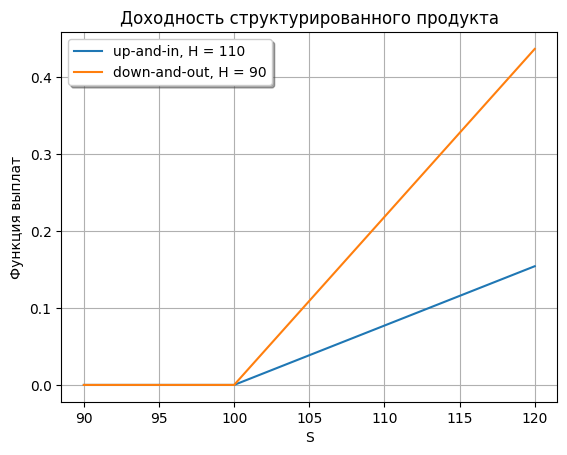

In [31]:
S0 = 100
T = 1
N = 100000
sigma = 0.3
r = 0.07
S_data = np.linspace(90, 120, 100)

H_1 = 110
K_1 = 105
option_type = 'Up-and-in'
is_call = True
call_1 = barrier_option(option_type, S0, H_1, K_1, 0, T, r, 0, sigma, is_call)

H_2 = 90
K_2 = 120
option_type = 'Down-and-out'
is_call = True
call_2 = barrier_option(option_type, S0, H_2, K_2, 0, T, r, 0, sigma, is_call)

capital_guarantee = 1
r_sp_min = capital_guarantee - 1
da = N * np.exp(-r * T) * capital_guarantee

Q_1 = (N - da) / call_1
PR_1 = K_1 * Q_1/ N
r_sp_1 = np.maximum(r_sp_min, r_sp_min + PR_1 *(S_data - S0) / S0 )

Q_2 = (N - da) / call_2
PR_2 = K_2 * Q_2/ N
r_sp_2 = np.maximum(r_sp_min, r_sp_min + PR_2 *(S_data - S0) / S0 )

plt.plot(S_data, r_sp_1, label = 'up-and-in, H = 110')
plt.plot(S_data, r_sp_2, label = 'down-and-out, H = 90')
plt.title('Доходность структурированного продукта')
plt.xlabel('S')
plt.ylabel('Функция выплат')
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.grid(True)

## Задача

Задача. Сравните полученные результаты с функциями выплат, полученными при использовании гэп опционов, бинарных опционов (ЛБ2). Подкрепите выводы иллюстративными графиками.

Постройте зависимость стоимости барьерного опциона (Knock-out call, Knock-in call, Knock-out put Knock-in put) от расположения барьера: x – это барьер в процентах от цены (50, 500), y - стоимость барьерного опциона в % от стоимости обычного call.

Постройте графики зависимость КоУ от расположения барьера относительно страйка для продуктов: с knock-out call, knock-in call и ванильный кол; с knock-out put, knock-in put и ванильный call.

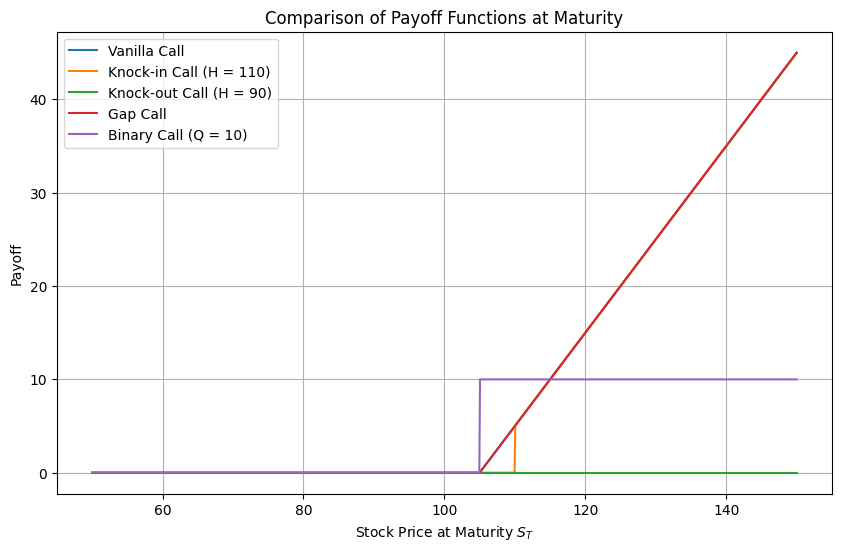

In [ ]:
S0 = 100      # Initial stock price
T = 1         # Time to maturity
sigma = 0.3   # Volatility
r = 0.07      # Risk-free interest rate
b = r         # Cost of carry (assuming no dividends)
K_call = 105  # Strike price for call
K_put = 120   # Strike price for put
H_ui = 110    # Up-and-in barrier
H_do = 90     # Down-and-out barrier
N = 100000    # Investment amount

def black_scholes_call(S, K, T, r, b, sigma):
    d1 = (np.log(S/K) + (b + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * np.exp((b - r) * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

def black_scholes_put(S, K, T, r, b, sigma):
    d1 = (np.log(S/K) + (b + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return K * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp((b - r) * T) * norm.cdf(-d1)

def gap_call(S, K, T, r, b, sigma):
    # Gap call option with K1 = K2 = K
    d1 = (np.log(S/K) + (b + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * np.exp((b - r) * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

def gap_put(S, K, T, r, b, sigma):
    # Gap put option with K1 = K2 = K
    d1 = (np.log(S/K) + (b + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return K * np.exp(-r * T) * norm.cdf(-d2) - S * np.exp((b - r) * T) * norm.cdf(-d1)

def cash_or_nothing_call(S, K, T, r, b, sigma, Q):
    d2 = (np.log(S/K) + (b - sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    return Q * np.exp(-r * T) * norm.cdf(d2)

def cash_or_nothing_put(S, K, T, r, b, sigma, Q):
    d2 = (np.log(S/K) + (b - sigma**2 / 2) * T) / (sigma * np.sqrt(T))
    return Q * np.exp(-r * T) * norm.cdf(-d2)

S_T = np.linspace(50, 150, 1000)

payoff_knock_in_call = np.where(S_T >= K_call, S_T - K_call, 0) * (S_T >= H_ui)
payoff_knock_out_call = np.where(S_T >= K_call, S_T - K_call, 0) * (S_T < H_do)
payoff_gap_call = np.where(S_T >= K_call, S_T - K_call, 0)

Q = 10  
payoff_binary_call = Q * (S_T >= K_call)

payoff_vanilla_call = np.where(S_T >= K_call, S_T - K_call, 0)

plt.figure(figsize=(10, 6))
plt.plot(S_T, payoff_vanilla_call, label='Vanilla Call')
plt.plot(S_T, payoff_knock_in_call, label='Knock-in Call (H = 110)')
plt.plot(S_T, payoff_knock_out_call, label='Knock-out Call (H = 90)')
plt.plot(S_T, payoff_gap_call, label='Gap Call')
plt.plot(S_T, payoff_binary_call, label='Binary Call (Q = 10)')
plt.xlabel('Stock Price at Maturity $S_T$')
plt.ylabel('Payoff')
plt.title('Comparison of Payoff Functions at Maturity')
plt.legend()
plt.grid(True)
plt.show()



C:\Users\smart\AppData\Local\Temp\ipykernel_4000\681234718.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

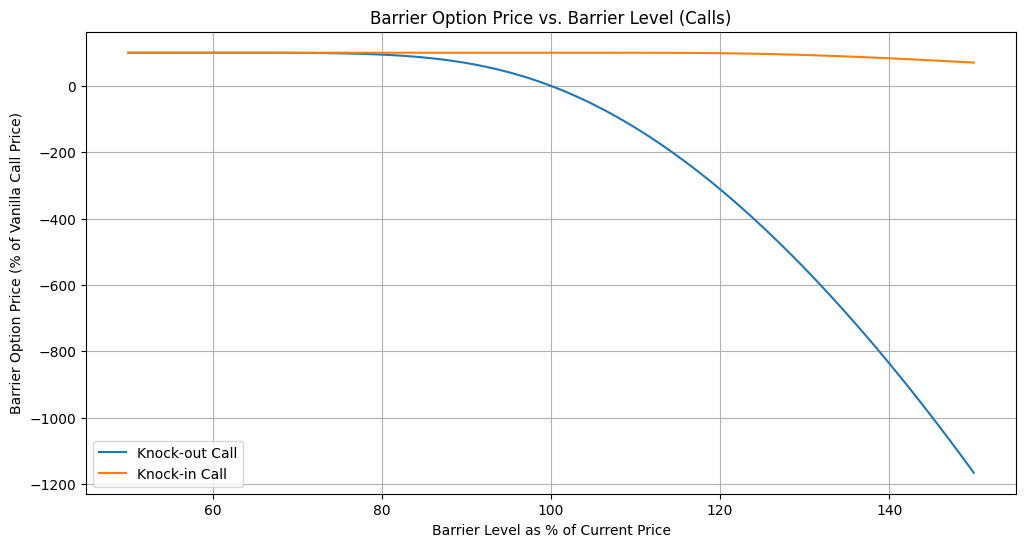

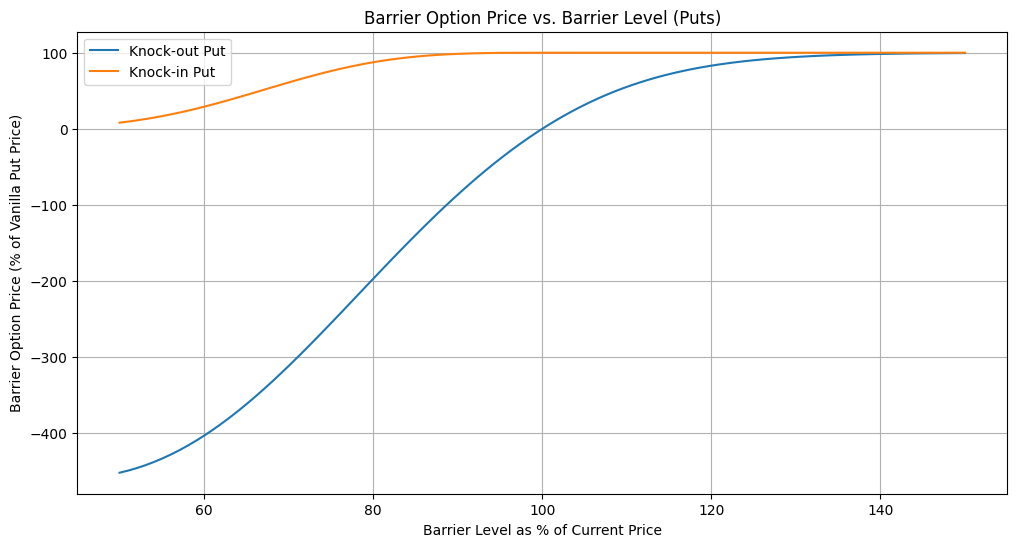

In [ ]:
barrier_percentages = np.linspace(0.5, 1.5, 100)
barrier_levels = barrier_percentages * S0

vanilla_call_price = black_scholes_call(S0, K_call, T, r, b, sigma)

knock_out_call_prices = []
knock_in_call_prices = []
knock_out_put_prices = []
knock_in_put_prices = []

for H in barrier_levels:
    # Knock-out call
    ko_call_price = barrier_option('Down-and-out', S0, H, K_call, 0, T, r, b, sigma, True)
    knock_out_call_prices.append(ko_call_price / vanilla_call_price * 100)  # Percentage of vanilla call price
    
    # Knock-in call
    ki_call_price = barrier_option('Up-and-in', S0, H, K_call, 0, T, r, b, sigma, True)
    knock_in_call_prices.append(ki_call_price / vanilla_call_price * 100)
    
    # Knock-out put
    ko_put_price = barrier_option('Up-and-out', S0, H, K_call, 0, T, r, b, sigma, False)
    vanilla_put_price = black_scholes_put(S0, K_call, T, r, b, sigma)
    knock_out_put_prices.append(ko_put_price / vanilla_put_price * 100)
    
    # Knock-in put
    ki_put_price = barrier_option('Down-and-in', S0, H, K_call, 0, T, r, b, sigma, False)
    knock_in_put_prices.append(ki_put_price / vanilla_put_price * 100)
    
    plt.figure(figsize=(12, 6))

plt.plot(barrier_percentages * 100, knock_out_call_prices, label='Knock-out Call')
plt.plot(barrier_percentages * 100, knock_in_call_prices, label='Knock-in Call')
plt.xlabel('Barrier Level as % of Current Price')
plt.ylabel('Barrier Option Price (% of Vanilla Call Price)')
plt.title('Barrier Option Price vs. Barrier Level (Calls)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))

plt.plot(barrier_percentages * 100, knock_out_put_prices, label='Knock-out Put')
plt.plot(barrier_percentages * 100, knock_in_put_prices, label='Knock-in Put')
plt.xlabel('Barrier Level as % of Current Price')
plt.ylabel('Barrier Option Price (% of Vanilla Put Price)')
plt.title('Barrier Option Price vs. Barrier Level (Puts)')
plt.legend()
plt.grid(True)
plt.show()



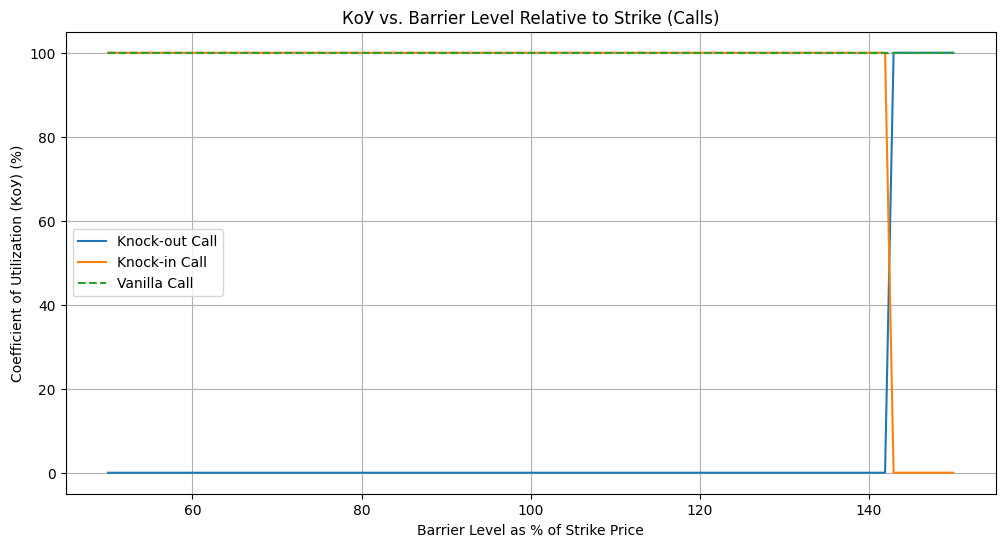

In [ ]:
barrier_percentages_strike = np.linspace(0.5, 1.5, 100)
barrier_levels_strike = barrier_percentages_strike * K_call

kou_knock_out_call = []
kou_knock_in_call = []
kou_vanilla_call = []

for H in barrier_levels_strike:
    S_T_high = 150  # High stock price at maturity
    max_payoff = S_T_high - K_call  # Maximum possible payoff for a call
    
    # Knock-out call
    if H < S_T_high:
        payoff = 0  # Option knocked out
    else:
        payoff = max(S_T_high - K_call, 0)
    kou_knock_out_call.append(payoff / max_payoff * 100)
    
    # Knock-in call
    if H > S_T_high:
        payoff = 0  # Barrier not breached
    else:
        payoff = max(S_T_high - K_call, 0)
    kou_knock_in_call.append(payoff / max_payoff * 100)
    
    # Vanilla call
    payoff = max(S_T_high - K_call, 0)
    kou_vanilla_call.append(payoff / max_payoff * 100)

plt.figure(figsize=(12, 6))

plt.plot(barrier_percentages_strike * 100, kou_knock_out_call, label='Knock-out Call')
plt.plot(barrier_percentages_strike * 100, kou_knock_in_call, label='Knock-in Call')
plt.plot(barrier_percentages_strike * 100, kou_vanilla_call, label='Vanilla Call', linestyle='--')
plt.xlabel('Barrier Level as % of Strike Price')
plt.ylabel('Coefficient of Utilization (КоУ) (%)')
plt.title('КоУ vs. Barrier Level Relative to Strike (Calls)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
kou_knock_out_put = []
kou_knock_in_put = []
kou_vanilla_put = []

for H in barrier_levels_strike:
    # Expected payoff for barrier options (assuming S_T = 50)
    S_T_low = 50  # Low stock price at maturity
    max_payoff_put = K_call - S_T_low  # Maximum possible payoff for a put
    
    # Knock-out put
    if H > S_T_low:
        payoff = 0  # Option knocked out
    else:
        payoff = max(K_call - S_T_low, 0)
    kou_knock_out_put.append(payoff / max_payoff_put * 100)
    
    # Knock-in put
    if H < S_T_low:
        payoff = 0  # Barrier not breached
    else:
        payoff = max(K_call - S_T_low, 0)
    kou_knock_in_put.append(payoff / max_payoff_put * 100)
    
    # Vanilla put
    payoff = max(K_call - S_T_low, 0)
    kou_vanilla_put.append(payoff / max_payoff_put * 100)


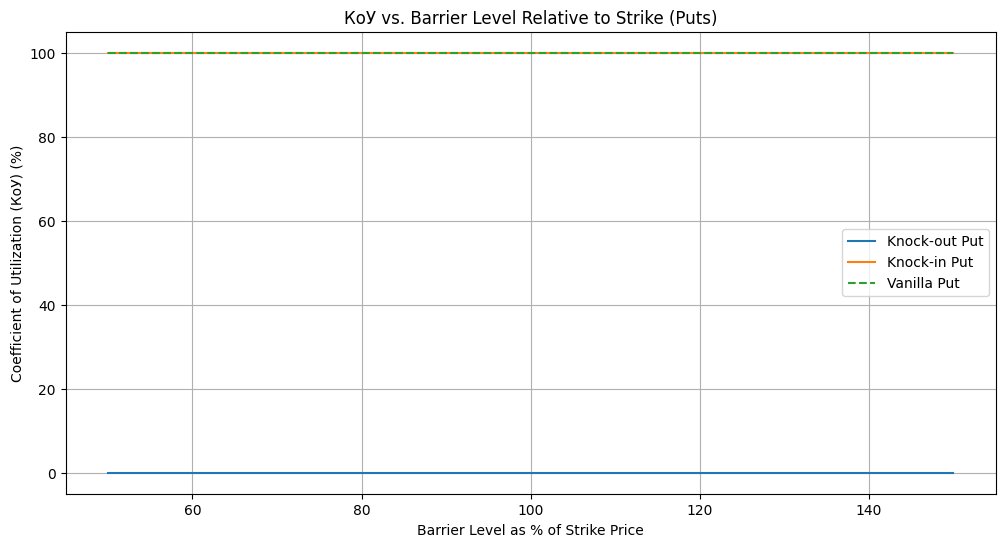

In [16]:
plt.figure(figsize=(12, 6))

plt.plot(barrier_percentages_strike * 100, kou_knock_out_put, label='Knock-out Put')
plt.plot(barrier_percentages_strike * 100, kou_knock_in_put, label='Knock-in Put')
plt.plot(barrier_percentages_strike * 100, kou_vanilla_put, label='Vanilla Put', linestyle='--')
plt.xlabel('Barrier Level as % of Strike Price')
plt.ylabel('Coefficient of Utilization (КоУ) (%)')
plt.title('КоУ vs. Barrier Level Relative to Strike (Puts)')
plt.legend()
plt.grid(True)
plt.show()


# Торговая стратегия (индивидуально)

## Проект

Задача. Торговая стратегия на основе опционного контракта Callable Bull or Bear Contract (CBBC).


[CBBC](https://https://www.hkex.com.hk/-/media/HKEX-Market/Products/Securities/Structured-Products/Product-Sheet/ProductSheet_CBBC.pdf) -- барьерный инструмент с эффектом рычага, в котором отслеживается цена базового актива.
Покупка (продажа) контракта Callable Bull (Bear) подразумевает, что инвестор занял длинную (короткую) позицию по базовому активу и имеет право на прибыль, когда стоимость этого актива вырастет (упадет).

Для контракта на повышение цены (Сallable Bull) цена включения (тригер) устанавливается либо на уровне цены страйка, либо выше. Обязательное событие включения (Mandatory Call Even, MCE) происходит, когда цена базового актива достигает цены тригера. Когда это происходит, торговля контрактом прекращается, сам контракт отзывается, и держатель контракта получает компенсацию в соответствии с заранее установленными условиями. Для контракта на понижение цены, цена включения (тригер) устанавливается либо на уровне цены страйка, либо ниже.

Разработайте торговую стратегию:
1.  Постройте прогноз дневных максимумов и минимумов для базового актива (например, через регрессию).
1.  Сигнал на покупку генерируется, когда прогнозируемый дневной максимум не ниже цены контракта.
1.  Купите базовый актив, когда сигнал на покупку наблюдается в течение $m$ последовательных дней.
1.  Закройте длинную позицию, когда сигнал на покупку исчезает в течение $m$ последовательных дней, происходит MCE или истекает срок действия контракта CBBC.
1.  Если позиция закрывается до MCE и срока действия контракта, то повторите шаги 2–4.

Проварьируйте параметр $m$ и проанализируейте P&L торговой стратегии.

[Исторические данные CBBC](https://www.hkex.com.hk/Products/Securities/Structured-Products/Trading-Information-and-Historical-Data?sc_lang=en)  

Статья ([Cheung et.al., 2010](https://www.sciencedirect.com/science/article/pii/S0927538X09000778?via%3Dihub)) или ([Cheung et.al., 2010](https://drive.google.com/file/d/1psFxTOZ8nf5IVuBcWKuKTEQ-JeJsRGPI/view?usp=drive_link))


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import datetime

import yfinance as yf

ticker_symbol = '^HSI'

start_date = '2018-01-01'
end_date = '2020-12-31'

df = yf.download(ticker_symbol, start=start_date, end=end_date)

print(df.head())


[*********************100%***********************]  1 of 1 completed

Price          Adj Close         Close          High           Low  \
Ticker              ^HSI          ^HSI          ^HSI          ^HSI   
Date                                                                 
2018-01-02  30515.310547  30515.310547  30515.310547  30028.289062   
2018-01-03  30560.949219  30560.949219  30724.320312  30456.759766   
2018-01-04  30736.480469  30736.480469  30796.929688  30560.429688   
2018-01-05  30814.640625  30814.640625  30911.009766  30638.529297   
2018-01-08  30899.529297  30899.529297  30929.150391  30732.539062   

Price               Open      Volume  
Ticker              ^HSI        ^HSI  
Date                                  
2018-01-02  30028.289062  2442333400  
2018-01-03  30658.730469  2309467700  
2018-01-04  30691.710938  2995571100  
2018-01-05  30893.859375  2263930100  
2018-01-08  30895.089844  2004162500  


In [21]:
# Calculate daily returns
df['Return'] = df['Close'].pct_change()

# Create lag features
df['Lag1_Close'] = df['Close'].shift(1)
df['Lag1_High'] = df['High'].shift(1)
df['Lag1_Low'] = df['Low'].shift(1)
df['Lag1_Return'] = df['Return'].shift(1)

# Drop rows with NaN values
df.dropna(inplace=True)


In [22]:
# Define the features and target variables
features = ['Open', 'Lag1_Close', 'Lag1_High', 'Lag1_Low', 'Lag1_Return', 'Day']
target_high = 'High'
target_low = 'Low'

# Split into training and test sets
train_size = int(len(df) * 0.7)
train_df = df[:train_size]
test_df = df[train_size:]


In [23]:
# Train the model for predicting daily highs
model_high = LinearRegression()
model_high.fit(train_df[features], train_df[target_high])

# Train the model for predicting daily lows
model_low = LinearRegression()
model_low.fit(train_df[features], train_df[target_low])


LinearRegression()

In [24]:
# Predict on the test set
test_df['Predicted_High'] = model_high.predict(test_df[features])
test_df['Predicted_Low'] = model_low.predict(test_df[features])

# Preview the predictions
print(test_df[['Date', 'High', 'Predicted_High', 'Low', 'Predicted_Low']].head())


Price        Date          High Predicted_High           Low Predicted_Low
Ticker                     ^HSI                         ^HSI              
517    2020-02-10  27314.640625   27255.564350  27044.880859  26930.141849
518    2020-02-11  27674.810547   27636.970004  27436.990234  27317.375899
519    2020-02-12  27892.480469   27845.428758  27614.830078  27559.714779
520    2020-02-13  27953.650391   28075.835318  27695.599609  27773.546479
521    2020-02-14  27960.660156   27853.651427  27695.589844  27532.535463


C:\Users\smart\AppData\Local\Temp\ipykernel_4000\3533001332.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Predicted_High'] = model_high.predict(test_df[features])
C:\Users\smart\AppData\Local\Temp\ipykernel_4000\3533001332.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Predicted_Low'] = model_low.predict(test_df[features])


In [25]:
# Strategy parameter: Number of consecutive days for the signal to persist
m_values = [1, 2, 3, 5]  # You can vary m as needed


In [1]:
# Initialize a DataFrame to store P&L results
pnl_results = pd.DataFrame(columns=['m', 'Total_Return', 'Annualized_Return', 'Max_Drawdown'])

for m in m_values:
    # Copy the test dataframe to avoid modifying the original
    strategy_df = test_df.copy()

    # Initialize the signal columns
    strategy_df['Buy_Signal'] = 0
    strategy_df['Position'] = 0  # 1 for long, 0 for no position
    strategy_df['Strategy_Return'] = 0

    # Generate buy signals
    strategy_df['Buy_Signal'] = np.where(
        strategy_df['Predicted_High'] >= strategy_df['Close'],
        1,
        0
    )

    # Rolling window to check for m consecutive days
    strategy_df['Buy_Signal_Count'] = strategy_df['Buy_Signal'].rolling(window=m).sum()

    # Generate positions based on the strategy rules
    position = 0
    position_entry_price = 0
    for i in range(len(strategy_df)):
        # Check for MCE (simulate MCE as when the actual low price reaches the Call Price)
        # For simulation, let's define the Call Price as 95% of the Close price
        call_price = strategy_df.loc[i, 'Close'] * 0.95

        # Check if we have an open position
        if position == 0:
            # Open a new position if Buy_Signal_Count equals m
            if strategy_df.loc[i, 'Buy_Signal_Count'] == m:
                position = 1
                position_entry_price = strategy_df.loc[i, 'Close']
                strategy_df.at[i, 'Position'] = position
        else:
            # Check for position closing conditions
            # Signal disappears for m consecutive days
            signal_disappear = strategy_df['Buy_Signal'].iloc[i-m+1:i+1].sum() == 0

            # MCE occurs (Low price reaches Call Price)
            mce_occurs = strategy_df.loc[i, 'Low'] <= call_price

            # Contract expiry (we'll simulate with the end of the test period)
            contract_expiry = False  # For simplicity, assume contract does not expire in test period

            if signal_disappear or mce_occurs or contract_expiry:
                # Close the position
                position = 0
                exit_price = strategy_df.loc[i, 'Close']
                # Calculate the return from the trade
                trade_return = (exit_price - position_entry_price) / position_entry_price
                strategy_df.at[i, 'Strategy_Return'] = trade_return
                strategy_df.at[i, 'Position'] = position
                position_entry_price = 0
            else:
                strategy_df.at[i, 'Position'] = position

    # Calculate cumulative returns
    strategy_df['Cumulative_Return'] = (1 + strategy_df['Strategy_Return']).cumprod()

    # Calculate total return, annualized return, and maximum drawdown
    total_return = strategy_df['Cumulative_Return'].iloc[-1] - 1
    num_years = (strategy_df['Date'].iloc[-1] - strategy_df['Date'].iloc[0]).days / 365
    annualized_return = (1 + total_return) ** (1 / num_years) - 1
    max_drawdown = strategy_df['Cumulative_Return'].cummax() - strategy_df['Cumulative_Return']
    max_drawdown = max_drawdown.max()

    # Append the results to the DataFrame
    pnl_results = pnl_results.append({
        'm': m,
        'Total_Return': total_return,
        'Annualized_Return': annualized_return,
        'Max_Drawdown': max_drawdown
    }, ignore_index=True)

    # Plot the cumulative return for the current m
    plt.figure(figsize=(10, 6))
    plt.plot(strategy_df['Date'], strategy_df['Cumulative_Return'], label=f'm = {m}')
    plt.title(f'Cumulative Return for m = {m}')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.legend()
    plt.grid(True)
    plt.show()


NameError: name 'pd' is not defined

# Примеры на барьерные опционы

Zhang, c. 223

Пример 2.
Вычислите цену опциона down-and-in колл, если цена страйк  равна 98, цена исполнения через полгода 92. Цена акции 100, барьер 95, безрисковая ставка 8%, дивидендная доходность 3%, волатильность 20%.

Вычислить значение компенсационной выплаты по полугодовому барьерному опциону down-and-in колл на начальный момент, при условии, что эта выплата равна 1.5 на дату экспирации, если барьер не достигнут. Цена акции 100, барьер 95, волатильность 0.2, безрисковая ставка 0.08, дивидентная ставка 0.03.

In [34]:
S = 100
H = 95
K = 98

T = 0.5
r = 0.08
q = 0.03
R_T = 1.5

sigma = 0.2

# if K = 98 > H = 95

d1 = (np.log(H**2/S/K) + (r-q-sigma**2/2)*T)/(sigma * np.sqrt(T))
d2 = d1 + sigma * np.sqrt(T)
# print(d1);print(d2)

price_down_in_call = (H/S)**(2*(r-q-sigma**2/2)/sigma**2)*(H**2/S*np.exp(-q*T)*norm.cdf(d2)-K*np.exp(-r*T)*norm.cdf(d1))
print('price_down_in_call = ', price_down_in_call)

d1 = (np.log(S/H) + (r-q-sigma**2/2)*T)/(sigma * np.sqrt(T))
d2 = (np.log(H/S) + (r-q-sigma**2/2)*T)/(sigma * np.sqrt(T))

R = R_T * np.exp(-r*T)*(norm.cdf(d1)- (H/S)**((2*0.03)/sigma**2)*norm.cdf(d2))
print('rebate = ', R)

price_down_in_call =  2.7338748685456857
rebate =  0.448464125401398


Задача. В условиях примера 2 вычислить стоимость опциона, если цена страйк 92 (ниже барьера).

In [35]:
K = 92
call = barrier_option('Down-and-in',S, H, K, R, T, r, b, sigma, is_call=True)
print(f"call price = {call}")


call price = 4.465424618090829


In [ ]:
S = 100        
H = 95        
K = 92        
T = 0.5        
r = 0.08      
q = 0.03       
sigma = 0.2    
R_T = 1.5     

mu = (r - q - 0.5 * sigma**2) / sigma**2
print(f"mu = {mu:.4f}")

y1 = (np.log((H**2) / (S * K)) + (mu + 1) * sigma**2 * T) / (sigma * np.sqrt(T))
y2 = y1 - sigma * np.sqrt(T)
print(f"y1 = {y1:.4f}")
print(f"y2 = {y2:.4f}")

N_y1 = norm.cdf(y1)
N_y2 = norm.cdf(y2)
print(f"N(y1) = {N_y1:.4f}")
print(f"N(y2) = {N_y2:.4f}")

price_down_in_call = (H / S)**(2 * mu) * ((H**2 / S) * np.exp(-q * T) * N_y1 - K * np.exp(-r * T) * N_y2)
print('Down-and-In Call Option Price:', round(price_down_in_call, 4))

d1 = (np.log(S / H) + (r - q - 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
d2 = (np.log(H / S) + (r - q - 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
print(f"d1 = {d1:.4f}")
print(f"d2 = {d2:.4f}")

N_d1 = norm.cdf(d1)
N_d2 = norm.cdf(d2)
print(f"N(d1) = {N_d1:.4f}")
print(f"N(d2) = {N_d2:.4f}")

power = (2 * q) / sigma**2
H_S_power = (H / S)**power
print(f"(H/S)^(2q/sigma^2) = {H_S_power:.4f}")

rebate = R_T * np.exp(-r * T) * (N_d1 - H_S_power * N_d2)
print('Rebate Present Value:', round(rebate, 4))

total_option_price = price_down_in_call + rebate
print('Total Option Price:', round(total_option_price, 4))


mu = 0.7500
y1 = 0.1117
y2 = -0.0297
N(y1) = 0.5445
N(y2) = 0.4881
Down-and-In Call Option Price: 4.869
d1 = 0.4688
d2 = -0.2566
N(d1) = 0.6804
N(d2) = 0.3987
(H/S)^(2q/sigma^2) = 0.9259
Rebate Present Value: 0.4485
Total Option Price: 5.3175
